# TFIDF

NLTK Stopwords Download: Obtains stopwords using NLTK for text preparation.
Text Preprocessing: Tokenizes text, removes stopwords, and prepares it for analysis.
Token Frequency Count: Determines token frequency in the text.
Word Cloud Visualization: Creates a word cloud using WordCloud and Matplotlib from token frequency DataFrame.
Document Frequency (DF) and Inverse Document Frequency (IDF): Computes DF and IDF for phrases in the corpus.
TF-IDF Calculation: Computes TF-IDF scores by multiplying TF with IDF.
Word Cloud Visualization with TF-IDF: Generates a word cloud using WordCloud and Matplotlib from TF-IDF DataFrame.
Term Counting: Counts specific keywords in a token collection, returning counts for each term.
Keyword Count by Group: Computes sum of keyword counts grouped by a DataFrame column.
Histogram Plot for Tokens vs. Sentiment: Plots a histogram depicting token frequency against positive/negative sentiment.

In [1]:
import pandas as pd
# Read the CSV file into a DataFrame and display the first 20 rows
file = "C:\\Users\\DELL\\Desktop\\CS-652 Text Based Analysis\\amazon_reviews.csv"
df = pd.read_csv(file)
#df= df[df['year']==1970]
df.head(20)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0
5,A2IDCSC6NVONIZ,B007WTAJTO,2Cents!,"[0, 0]",It's mini storage. It doesn't do anything els...,5.0,Not a lot to really be said,1367193600,2013-04-29,588,0,0
6,A26YHXZD5UFPVQ,B007WTAJTO,2K1Toaster,"[0, 0]",I have it in my phone and it never skips a bea...,5.0,Works well,1382140800,2013-10-19,415,0,0
7,A3CW0ZLUO5X2B1,B007WTAJTO,"35-year Technology Consumer ""8-tracks to 802.11""","[0, 0]",It's hard to believe how affordable digital ha...,5.0,32 GB for less than two sawbucks...what's not ...,1404950400,2014-10-07,62,0,0
8,A2CYJO155QP33S,B007WTAJTO,4evryoung,"[1, 1]",Works in a HTC Rezound. Was running short of ...,5.0,Loads of room,1395619200,2014-03-24,259,1,1
9,A2S7XG3ZC4VGOQ,B007WTAJTO,53rdcard,"[0, 0]","in my galaxy s4, super fast card, and am total...",5.0,works great,1381449600,2013-11-10,393,0,0


In [2]:
# Download the stopwords corpus, load English stopwords, and print them
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'there', 'more', 'they', 'isn', 'yourself', "wasn't", 'up', 'off', 'will', 'can', 'now', 'just', "mightn't", "aren't", 'doesn', "shouldn't", 'do', 'of', 'before', 'down', 'below', 'once', 'than', 'both', 'few', 'ma', 'how', 'them', 'shan', 'as', "hadn't", 'for', 'mightn', 'theirs', 'doing', 're', 'm', 'further', 'were', 'this', 'here', "needn't", 'own', 'only', "weren't", 'didn', 'an', 'after', 'its', "don't", 'such', 'or', 'themselves', 'who', 'her', 'our', "hasn't", 'the', "you'll", 'you', 'have', 'i', 'he', 'ours', 'yours', 'did', 'shouldn', 'wasn', 'himself', 'hadn', 'ain', 'weren', 'through', 'under', "haven't", "won't", 'all', 'other', 'herself', 'has', 'most', 'while', "you've", 'itself', "didn't", 'my', "wouldn't", 'needn', "you'd", 'too', "should've", 'him', 'whom', 'against', "she's", 'where', "doesn't", 'are', 'but', 'nor', 'which', 'those', 'does', 'on', 'any', 'no', 'll', 'about', 'above', "couldn't", 've', 'your', 'between', 'until', 'o', "it's", 'couldn', 'when', 'if', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Define a pipeline for text preprocessing: convert to lowercase, tokenize, and remove stopwords
import regex as re
def tokenize(reviewText):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', reviewText)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]

In [9]:
# Define a function to preprocess text using a given pipeline
def prepare(text, pipeline):
    if isinstance(text, str):
        tokens = text
        for fun in pipeline:
            tokens = fun(tokens)
        return tokens
    else:
        return ""  # or any other handling for non-string inputs
# Apply the text preprocessing function to the 'reviewText' column using the defined pipeline
df['tokens'] = df['reviewText'].apply(prepare, pipeline=pipeline)


In [10]:
# Count the frequency of tokens in the 'tokens' column, filter out those with frequency less than 1, and display the top 10 frequent tokens.
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'tokens'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
tokens,
card,4712
phone,1776
works,1585
great,1480
memory,1372
sandisk,1335
sd,1212
use,1124
one,1096


In [11]:
# Import necessary libraries for creating word clouds and visualizing them.
from wordcloud import WordCloud
from matplotlib import pyplot as plt

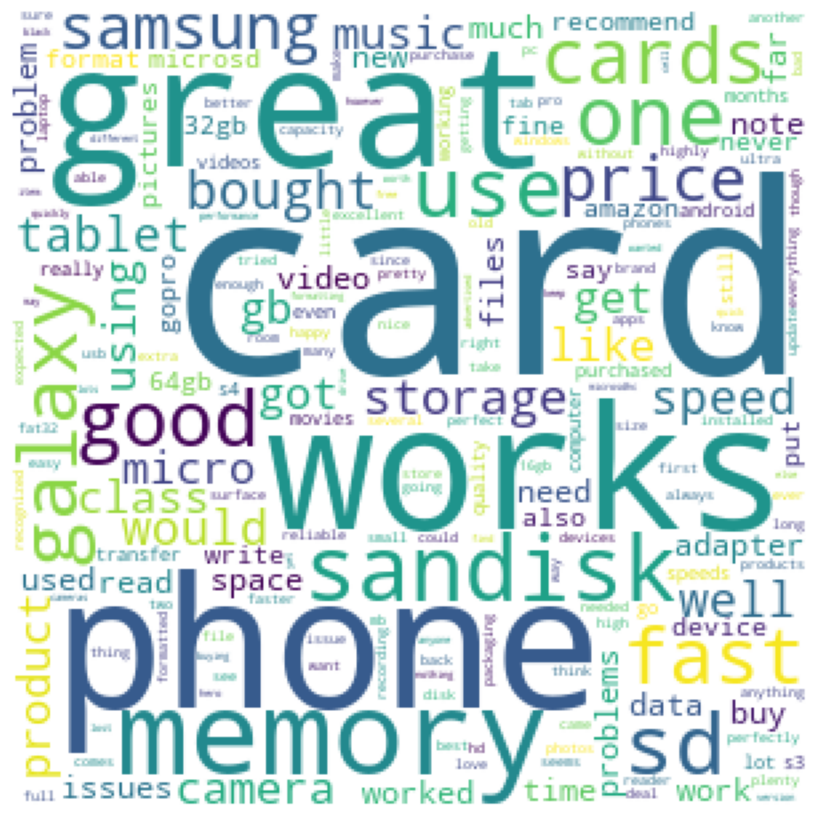

In [12]:
# Create a WordCloud object with specified parameters and fit it with word frequencies.
# Create a matplotlib figure for displaying the word cloud and show it.
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [13]:
import numpy as np
# Define a function to compute IDF (Inverse Document Frequency) values for tokens in a DataFrame
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    # Define an inner function to update the counter with tokens from each document
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    # Apply the update function to each document in the specified column
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
     # Compute IDF values and add them to the DataFrame
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
# Compute IDF values for tokens in the 'tokens' column of the DataFrame df
idf_df = compute_idf(df)


In [14]:
# Multiply the frequency (freq) of each token by its corresponding IDF (idf) value to compute TF-IDF
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
tokens,,
card,4712,4098.837982
phone,1776,2757.292945
works,1585,2081.375434
great,1480,2150.846783
memory,1372,2271.976879


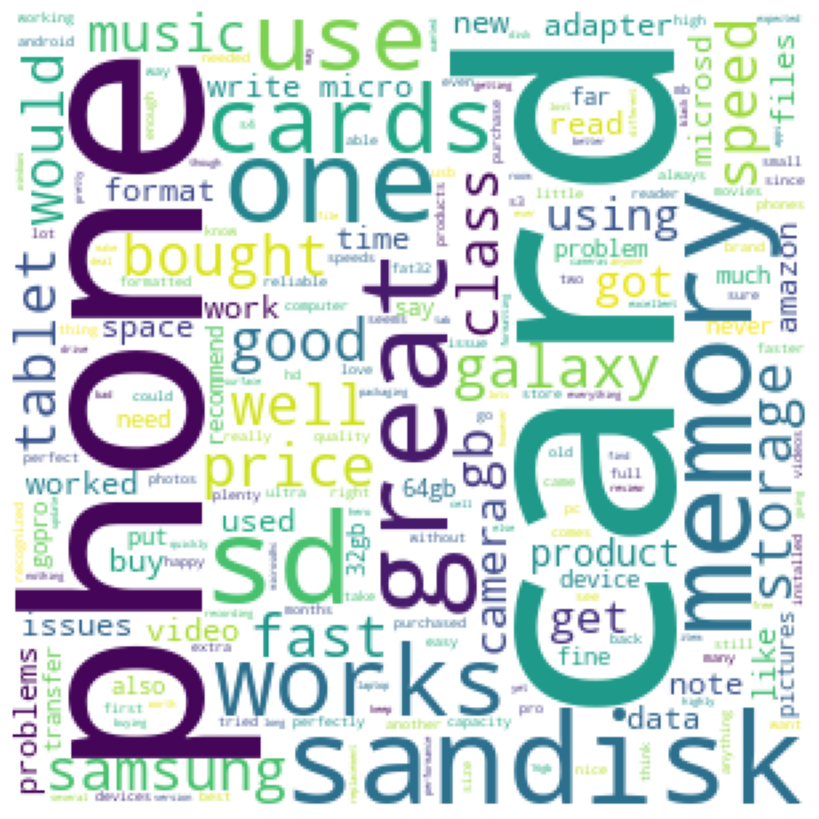

In [15]:
# Generate WordCloud with TF-IDF values
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
# Plot the WordCloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
# Display the plot
plt.show()


In [16]:
# Calculate the number of tokens in each review
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]


In [17]:
# Define a function to count the occurrences of keywords grouped by a specified column
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)


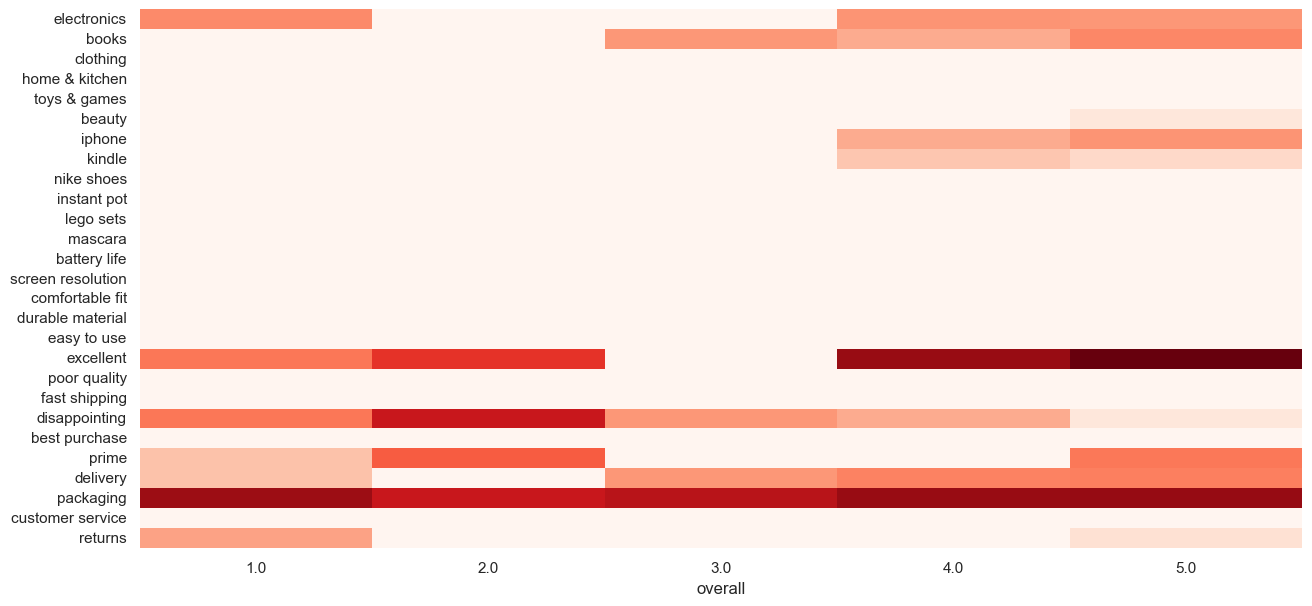

In [23]:
import seaborn as sns
keywords = ['electronics', 'books', 'clothing', 'home & kitchen', 'toys & games', 'beauty',
            'iphone', 'kindle', 'nike shoes', 'instant pot', 'lego sets', 'mascara',
            'battery life', 'screen resolution', 'comfortable fit', 'durable material', 'easy to use',
            'excellent', 'poor quality', 'fast shipping', 'disappointing', 'best purchase',
            'prime', 'delivery', 'packaging', 'customer service', 'returns']  
freq_df = count_keywords_by(df, by='overall', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('overall')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7)) 
sns.set(font_scale=1) 
sns.heatmap(data=freq_df.T, 
            xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)